<a href="https://colab.research.google.com/github/iremegrikaya/HumanCount/blob/main/dog_breed_identification_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DEEP LEARNING CA-1**

**FATIMA IREM EGRIKAYA**

**10575095** 

##**Dog's Breed Identification Project**

####In this Python deep learning project, we will create a model for dog breed identification. We will convert all Dog Images to number format using 'OpenCV' and other methods and then feed them into Resnet50V2 and VGG16, a special type of neural network under the Transfer Learning technique that will help us identify the breed of dog. First, we will create our own neural network and train it with our own dataset. Then we will train our ResNet model with our own dataset by setting ResNet imagenet trainable layer = True. We will train our model with the ResNet50V2 and VGG16 model using the latest Transfer Learning and compare the results

##**Dataset**
https://www.kaggle.com/c/dog-breed-identification

##**Structure of The Model**

####***Transfer Learning*** : The reuse of a pre-trained model on a new problem is known as transfer learning in machine learning. A machine uses the knowledge learned from a prior assignment to increase prediction about a new task in transfer learning.


####***ResNet*** : Residual Network (ResNet) is a specific type of neural network which is used for many computer vision problems. ResNet contains convolutional, pooling, activation and fully-connected layers stacked one of the other.These layers of ResNet are pre-trained on more than a million of images from the ImageNet database. Due to many layers, ResNet solves complex problems and increases model accuracy and performance.

#**CODE**

I will export my dataset from drive to colab

In [1]:
from google.colab import drive 
drive.mount('/content/drive') 

Mounted at /content/drive


Unzip them 

In [2]:
!unzip /content/drive/MyDrive/dog-breed-identification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

###Import required libraries

In [3]:
import cv2
import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt
import tensorflow as tf 
import seaborn as sns


from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization,Input,MaxPooling2D,ZeroPadding2D,Conv2D,Flatten
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from keras.layers import Conv2D, MaxPooling2D, Activation,Dense
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical

Location of training and test data

In [4]:
train_path = "/content/train"
test_path = "/content/test"

Transform the ‘labels.csv’ and convert it to a Dataframe

In [5]:
labels_df= pd.read_csv("/content/labels.csv")

In [6]:
labels_df.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


Print the top 30 most repetitive dog breeds

In [7]:
labels_df['breed'].value_counts()[:30]

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
airedale                107
tibetan_terrier         107
leonberg                106
cairn                   106
beagle                  105
japanese_spaniel        105
australian_terrier      102
blenheim_spaniel        102
miniature_pinscher      102
irish_wolfhound         101
lakeland_terrier         99
saluki                   99
papillon                 96
norwegian_elkhound       95
whippet                  95
siberian_husky           95
pug                      94
chow                     93
italian_greyhound        92
pembroke                 92
Name: breed, dtype: int64

Draw bar plot to review

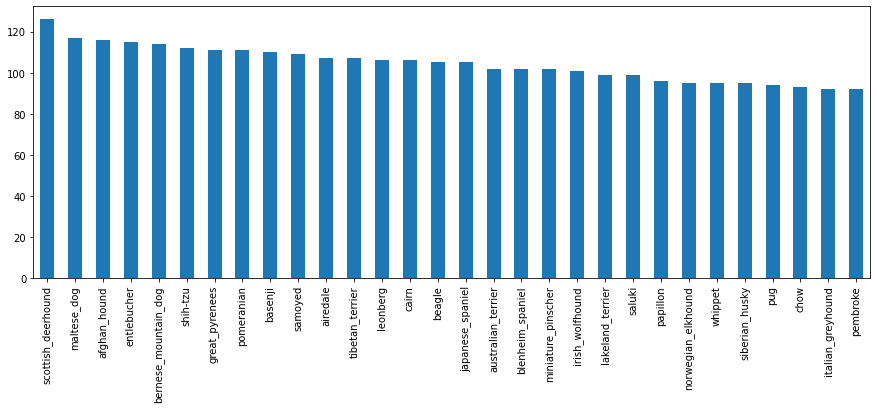

In [12]:
plt.figure(figsize=(15, 5))
labels_df['breed'].value_counts()[:30].plot(kind='bar')
plt.show()

One image from the dataset

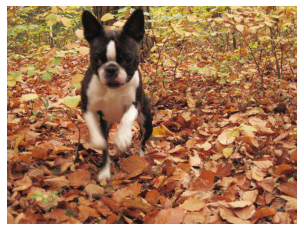

In [9]:
image = load_img(train_path + "/000bec180eb18c7604dcecc8fe0dba07.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

Shape of our image

In [13]:
x = img_to_array(image)
print(x.shape)

(375, 500, 3)


In [14]:
class_names = labels_df['breed'].value_counts()[:30].index.tolist() #convert to list

In [15]:
labels_df = labels_df[labels_df['breed'].isin(class_names)] #isin() method is used to filter data frames.

Reorganise to Dataframe, if we don't do that after each repetition, we must append the extension.

In [16]:
labels_df['img_path'] = labels_df['id'].apply(lambda x: x + ".jpg")
labels_df.head()

,id,breed,img_path
8,003df8b8a8b05244b1d920bb6cf451f9,basenji,003df8b8a8b05244b1d920bb6cf451f9.jpg
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound,0042188c895a2f14ef64a918ed9c7b64.jpg
12,00693b8bc2470375cc744a6391d397ec,maltese_dog,00693b8bc2470375cc744a6391d397ec.jpg
18,007ff9a78eba2aebb558afea3a51c469,lakeland_terrier,007ff9a78eba2aebb558afea3a51c469.jpg
29,00bee065dcec471f26394855c5c2f3de,cairn,00bee065dcec471f26394855c5c2f3de.jpg


In [17]:
labels_df.shape

(3134, 3)

Convert index numbers into sequential form

In [18]:
labels_df.reset_index(drop = True, inplace = True)
labels_df.head()

,id,breed,img_path
0,003df8b8a8b05244b1d920bb6cf451f9,basenji,003df8b8a8b05244b1d920bb6cf451f9.jpg
1,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound,0042188c895a2f14ef64a918ed9c7b64.jpg
2,00693b8bc2470375cc744a6391d397ec,maltese_dog,00693b8bc2470375cc744a6391d397ec.jpg
3,007ff9a78eba2aebb558afea3a51c469,lakeland_terrier,007ff9a78eba2aebb558afea3a51c469.jpg
4,00bee065dcec471f26394855c5c2f3de,cairn,00bee065dcec471f26394855c5c2f3de.jpg


In [21]:
number_of_class = len(labels_df.breed.unique())
print(number_of_class)

30


In [22]:
labels_df.shape

(3134, 3)

In [23]:
num_of_img = labels_df.shape[0]
print(num_of_img)

3134


Define values for hyperparameters

In [24]:
img_size = 224
num_epochs = 20
batch_size = 64
learning_rate = 0.001
encoder = LabelEncoder()

Create a empyt array, after we will fill it

In [25]:
X_train = np.zeros((len(labels_df), img_size, img_size, 3), dtype='float32')

In [35]:
#iterate over img_path column of our dataset

for i, img_id in enumerate(labels_df['img_path']):
#read and convert into numerical format to our image file
#resize all images to 224x224 because VGG and ResNet model just accept this size
   img = cv2.resize(cv2.imread(train_path + "/" + img_id ,cv2.IMREAD_COLOR),((img_size,img_size)))
   img_array = preprocess_input(np.expand_dims(np.array(img[...,::-1].astype(np.float32)).copy(), axis=0))
#upload to X_train with new size
   
   X_train[i] = img_array

We need to transform target dataset from words to numerical data, because python doesn't understand the "words"

In [28]:
Y_train = encoder.fit_transform(labels_df["breed"].values)

Split the data into train,test and validation sets

In [29]:
# for train = 80%
# for test = 20%
x_train_val, x_test, y_train_val, y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_val,y_train_val,test_size=0.2,random_state=42)

**What is Image Augmentation?**

Image augmentation is a technique of altering the existing data to create some more data for the model training process. In other words, it is the process of artificially expanding the available dataset for training a deep learning model.

In [30]:
#image augmentation with ImageDataGenerator class
train_datagen = ImageDataGenerator(
                                   rotation_range = 50,
                                   zoom_range = 0.3,
                                   width_shift_range = 0.25,
                                   height_shift_range = 0.25,
                                   shear_range = 0.3,
                                   horizontal_flip = True,
                                   )
 

test_datagen = ImageDataGenerator()

# we generate images for training dataset
train_generator = train_datagen.flow(x_train, 
                                     y_train, 
                                     batch_size = batch_size)
                                     
                                                    
 
 
test_generator = test_datagen.flow(x_test, 
                                   y_test, 
                                   batch_size=batch_size)

We will not include the top layer which is the output of the pretrained network, instead, we will replace it with our input having the shape of mxnx3 dimensions. The layer expects input shape of 224×224.

In [31]:
#build a Resnet model
resnet = ResNet50V2(input_shape = [img_size,img_size,3], weights='imagenet', include_top=False)
#freeze all trainable layers and train only top layers 
for layer in resnet.layers:
    layer.trainable = True
 
#add global average pooling layer and Batch Normalization layer
x = resnet.output
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)

#add fully connected layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)

94683136/94668760 [==============================] - 1s 0us/step


Create a Dense(fully connected) layer for output with the shape equal to the number of breeds and ‘softmax’ activation function. Then Initialize Model Class with network input and Dense layer as output

In [32]:
#add output layer having the shape equal to number of breeds
predictions = Dense(number_of_class, activation='softmax')(x)
 
#create model class with inputs and outputs
model = Model(inputs=resnet.input, outputs=predictions)
#model.summary()

In [38]:
#using RMSprop optimizer to compile or build the model
optimizer = RMSprop(learning_rate=learning_rate,rho=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])
 
#fit the training generator data and train the model
hist = model.fit(train_generator,
                 steps_per_epoch= x_train.shape[0] // batch_size,
                 epochs= 10,
                 validation_data= test_generator,
                 validation_steps= x_test.shape[0] // batch_size)
 
#Save the model for prediction
model.save("model_layer_true.h5")

Epoch 1/10
35/35 [==============================] - 1397s 39s/step - loss: 3.4402 - accuracy: 0.0420 - val_loss: 1207.2106 - val_accuracy: 0.0352
Epoch 2/10
35/35 [==============================] - 1367s 39s/step - loss: 3.4122 - accuracy: 0.0447 - val_loss: 84.2201 - val_accuracy: 0.0195
Epoch 3/10
35/35 [==============================] - 1368s 40s/step - loss: 3.4011 - accuracy: 0.0465 - val_loss: 853.6210 - val_accuracy: 0.0195
Epoch 4/10
35/35 [==============================] - 1376s 39s/step - loss: 3.3781 - accuracy: 0.0538 - val_loss: 9.4771 - val_accuracy: 0.0430
Epoch 5/10
35/35 [==============================] - 1378s 39s/step - loss: 3.3167 - accuracy: 0.0739 - val_loss: 13.9872 - val_accuracy: 0.0312
Epoch 6/10
35/35 [==============================] - 1383s 40s/step - loss: 3.2137 - accuracy: 0.1004 - val_loss: 45.1102 - val_accuracy: 0.0273
Epoch 7/10
35/35 [==============================] - 1409s 40s/step - loss: 3.1076 - accuracy: 0.1200 - val_loss: 13.5726 - val_accurac

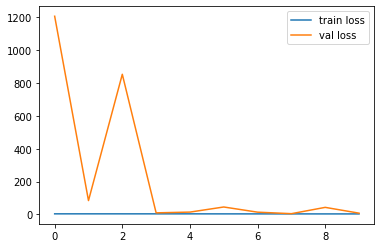

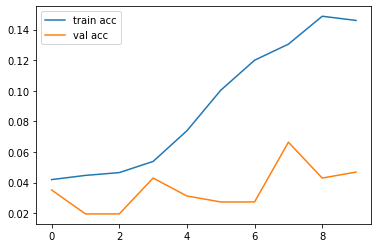

In [39]:
plt.plot(hist.history["loss"], label = "train loss")
plt.plot(hist.history["val_loss"], label = "val loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(hist.history["accuracy"], label = "train acc")
plt.plot(hist.history["val_accuracy"], label = "val acc")
plt.legend()
plt.show()

load the model

In [40]:
#load the model
model_new = load_model("model_layer_true.h5")

##PREDICTION TIME

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


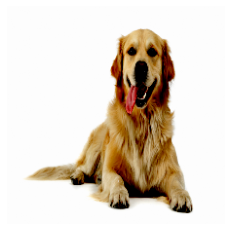

Predicted Breed for this Dog is : [17] ['miniature_pinscher']


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
#get the image of the dog for prediction
pred_img_path = '/content/golden.png'
#read the image file and convert into numeric format
#resize all images to one dimension i.e. 224x224
pred_img_array = cv2.resize(cv2.imread(pred_img_path,cv2.IMREAD_COLOR),((img_size,img_size)))
#scale array into the range of -1 to 1.
#expand the dimension on the axis 0 and normalize the array values
pred_img_array = preprocess_input(np.expand_dims(np.array(pred_img_array[...,::-1].astype(np.float32)).copy(), axis=0))
 
#feed the model with the image array for prediction
pred_val = model.predict(np.array(pred_img_array,dtype="float32"))
 
#display the image of dog


plt.imshow(pred_img_array.reshape(224,224,3))
plt.axis("off")
plt.show()
#display the predicted breed of dog
pred_breed = [np.argmax(pred_val)]
print("Predicted Breed for this Dog is :",pred_breed, encoder.inverse_transform([pred_breed]))

To create Confusion Matrix

In [42]:
y_prediction = model_new.predict(x_test)
print(y_prediction)

[[3.9448835e-02 1.5812721e-02 4.9540125e-02 ... 3.6627229e-03
  3.4430519e-02 6.0680553e-02]
 [2.4068905e-02 5.9770364e-03 2.4762271e-02 ... 7.6859724e-03
  3.6104716e-02 4.2400878e-02]
 [9.8780649e-05 1.4838118e-03 5.1258630e-03 ... 1.0071778e-04
  7.2058906e-06 8.9155728e-05]
 ...
 [6.6578981e-10 7.6151008e-07 1.0070617e-06 ... 3.1196362e-07
  9.1776478e-13 8.8854889e-11]
 [7.7738427e-02 2.1923471e-02 5.0340928e-02 ... 1.9961603e-03
  4.1765153e-02 5.6497067e-02]
 [1.7454140e-03 9.4594862e-03 3.1259604e-02 ... 2.9620211e-04
  1.8207041e-04 1.2977411e-03]]


In [43]:
model_new.evaluate(x_test, y_test)

10/10 [==============================] - 48s 4s/step - loss: 7.5370 - accuracy: 0.0414


[7.537012100219727, 0.041401274502277374]

In [45]:
y_true_list = []
y_pred_list = []
for i in range(len(y_prediction)):
  y_pred_list.append(class_names[np.argmax(y_prediction[i])])
  y_true_list.append(class_names[(y_test[i])])
  
   

Confusion Matrix

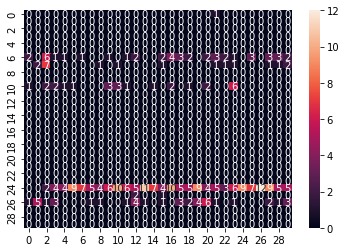

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_list, y_true_list)
sns.heatmap(cm, annot = True)

###**The accuracy rate of the model that we created using our own dataset instead of imagenet in the ResNet model is only 14%**

The comparison results are given in the report.